In [1]:
#Import packages

#Rdkit
from rdkit import Chem

#Scipy
from scipy import stats 
from scipy.stats import uniform,ranksums 

#Pandas
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
#AlvaDesc
from alvadesccliwrapper.alvadesc import AlvaDesc

#Others
from sklearn import preprocessing
import joblib 
import random
import numpy as np
import os
import math
import warnings

In [2]:
def print_RxC(dataframe):
    rows= dataframe.shape[0]
    columns= dataframe.shape[1]
    rows_columns=print(dataframe.shape[0],"Moleculars ×",dataframe.shape[1],"Descriptors")
    return rows_columns
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='spearman')
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [3]:
#Set the Work Path
warnings.filterwarnings ('ignore')
#Work Path
os.chdir("C:/Users/A/Desktop/Paper_0_Hydrogel")


In [4]:
X_NAomit_data= pd.read_csv('./Original data/X_NAomit_data.csv',index_col=0)
Raw_data= pd.read_csv('./Original data/Raw_data.csv',index_col=0)
X_scaled_data=pd.read_csv("./Original data/X_scaled_data.csv",index_col=0)
ML_data=pd.read_csv("./Original data/ML_data.csv",index_col=0)
X_scaled_data=pd.read_csv("./Original data/X_scaled_data.csv",index_col=0)
print_RxC(X_NAomit_data)
X_NAomit_data.head()

71 Moleculars × 4175 Descriptors


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,8.352500,20.0734,33.3526,19.8921,36.9899,0.627294,1.042269,0.621628,1.155934,...,0.0,0.0,0.0,10.0,16.0,0.842105,7.75,0.407895,17.966397,8.618182
Ma_2019_U,244.23,8.421724,17.9656,30.5854,17.5454,33.3290,0.619503,1.054669,0.605014,1.149276,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_C,243.25,8.108333,18.2722,31.3599,18.0966,34.6179,0.609073,1.045330,0.603220,1.153930,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_G,283.28,8.584242,20.7882,34.6799,20.3466,38.1993,0.629945,1.050906,0.616564,1.157555,...,0.0,0.0,0.0,5.0,17.0,0.850000,8.75,0.437500,19.586399,10.257197
Ma_2019_dA,251.28,8.105806,19.3586,32.0253,19.4376,35.7805,0.624471,1.033074,0.627019,1.154210,...,0.0,0.0,0.0,10.0,15.0,0.833333,7.00,0.388889,17.259745,8.115820


In [5]:
X_scaled_data

,MATS3p,MATS3v,SM10_AEA(dm),Eig01_EA(ed),SpMax_EA(ed),GATS3v,GATS7s,F07[N-O],SM12_EA(ed),SM09_EA(ed),...,minaaN,nLevel6,s2_pathLength,SpMAD_B(p),SpMAD_A,SM15_EA(ri),GNar,SM03_EA(ed),X0A,GATS8i
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.223067,0.344851,0.382490,0.382490,0.382490,0.689326,0.390779,0.500000,0.464641,0.497602,...,0.919692,0.363636,0.090909,0.674747,0.722310,0.523719,0.585611,0.552864,0.442403,0.586479
Ma_2019_U,0.218409,0.381663,0.270850,0.270850,0.270850,0.671199,0.589845,0.000000,0.317977,0.329816,...,0.000000,0.090909,0.090909,0.373885,0.326999,0.367153,0.174645,0.336752,0.830666,0.000000
Ma_2019_C,0.189242,0.354375,0.270850,0.270850,0.270850,0.713595,0.462449,0.166667,0.317977,0.329816,...,0.000000,0.090909,0.090909,0.316630,0.326999,0.351072,0.174645,0.336752,0.830666,0.485155
Ma_2019_G,0.307924,0.463942,0.390516,0.390516,0.390516,0.574721,0.365302,0.500000,0.474373,0.507991,...,0.936503,0.454545,0.090909,0.496875,0.503205,0.587196,0.479147,0.595103,0.560377,0.607829
Ma_2019_dA,0.277926,0.428750,0.290988,0.290988,0.290988,0.648332,0.582334,0.166667,0.347434,0.371078,...,0.930185,0.303030,0.151515,0.723311,0.788722,0.397757,0.705872,0.415790,0.311320,0.658417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tang_2019_ArabinoC,0.189242,0.354375,0.270850,0.270850,0.270850,0.713595,0.462449,0.166667,0.317977,0.329816,...,0.000000,0.090909,0.090909,0.316630,0.326999,0.351072,0.174645,0.336752,0.830666,0.485155
Tang_2019_DideoxyC,0.295604,0.532577,0.000000,0.000000,0.000000,0.596914,0.684967,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.272727,0.411682,0.440413,0.000000,0.394179,0.000000,0.567837,0.450176
Peters_2014_3,0.249158,0.444606,0.382490,0.382490,0.382490,0.629228,0.482570,0.333333,0.464641,0.497602,...,0.939989,0.363636,0.090909,0.674661,0.722310,0.565330,0.585611,0.552864,0.442403,0.496525


In [6]:
#Scale data
Scaler = preprocessing.MinMaxScaler()
Transformer =Scaler.fit(X_NAomit_data)
X_scaled_data=Transformer.transform(X_NAomit_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=X_NAomit_data.columns
X_scaled_data.index=Raw_data.index
print_RxC(X_scaled_data)
X_scaled_data.head()

71 Moleculars × 4175 Descriptors


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.128645,0.344210,0.080461,0.068574,0.061704,0.061803,0.626247,0.664286,0.241584,0.655409,...,0.0,0.0,0.0,0.31250,0.121212,0.339356,0.21875,0.775326,0.079529,0.156831
Ma_2019_U,0.075722,0.355749,0.027968,0.027742,0.008163,0.014576,0.555490,0.837066,0.089947,0.495217,...,0.0,0.0,0.0,0.00000,0.060606,0.210711,0.09375,0.740235,0.022043,0.038750
Ma_2019_C,0.073472,0.303509,0.035603,0.039171,0.020739,0.031203,0.460756,0.706940,0.073575,0.607187,...,0.0,0.0,0.0,0.00000,0.060606,0.210711,0.09375,0.740235,0.022043,0.038750
Ma_2019_G,0.165381,0.382840,0.098263,0.088160,0.072074,0.077405,0.650332,0.784635,0.195361,0.694387,...,0.0,0.0,0.0,0.15625,0.151515,0.394030,0.34375,0.871200,0.109017,0.278438
Ma_2019_dA,0.091909,0.303087,0.062659,0.048989,0.051335,0.046201,0.600609,0.536172,0.290789,0.613916,...,0.0,0.0,0.0,0.31250,0.090909,0.278607,0.12500,0.713778,0.066666,0.119558


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3,random_state=0)
pca.fit(X_scaled_data)
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_)  
print(pca.n_features_)
print(pca.n_features_in_)

[0.48883718 0.15907151 0.075489  ]
[66.24387154 21.55628264 10.2297528 ]
4175
4175


In [8]:
newdf = pca.fit_transform(X_scaled_data)
PCA_4175=pd.DataFrame(newdf)
PCA_4175.columns=["PCA1","PCA2","PCA3"]
PCA_4175.index=Raw_data.index
PCA_4175['gelation']=Raw_data['Gelability']
PCA_4175.head()

,PCA1,PCA2,PCA3,gelation
ID,,,,
Ma_2019_A,-8.110369,3.023317,0.228622,Gelable
Ma_2019_U,-9.203058,-5.161289,4.303567,Gelable
Ma_2019_C,-9.905787,-4.162274,3.496028,Gelable
Ma_2019_G,-7.421788,1.593281,-1.369542,Gelable
Ma_2019_dA,-8.889000,3.040215,2.050822,Gelable


In [9]:
PCA_4175

,PCA1,PCA2,PCA3,gelation
ID,,,,
Ma_2019_A,-8.110369,3.023317,0.228622,Gelable
Ma_2019_U,-9.203058,-5.161289,4.303567,Gelable
Ma_2019_C,-9.905787,-4.162274,3.496028,Gelable
Ma_2019_G,-7.421788,1.593281,-1.369542,Gelable
Ma_2019_dA,-8.889000,3.040215,2.050822,Gelable
...,...,...,...,...
Tang_2019_ArabinoC,-9.905787,-4.162274,3.496028,Notgelable
Tang_2019_DideoxyC,-11.721514,-4.926991,7.410120,Notgelable
Peters_2014_3,-7.766713,0.753488,0.345967,Notgelable


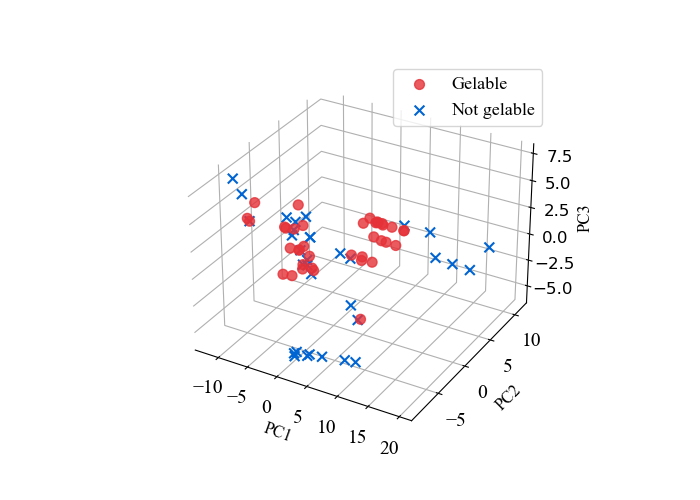

In [20]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib ipympl
plt.rcParams['figure.figsize'] = (7, 5) 
plt.rcParams['axes.facecolor']='white'
ax=plt.subplot(111,projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
gel_pca=PCA_4175.loc[PCA_4175["gelation"] == "Gelable"]
nogel_pca=PCA_4175.loc[PCA_4175["gelation"] == "Notgelable"]
ax.scatter(gel_pca['PCA1'],gel_pca["PCA2"],gel_pca["PCA3"],alpha=0.8, c="#e53238",label = 'Gelable',marker="o",s=50)
ax.scatter(nogel_pca['PCA1'],nogel_pca["PCA2"],nogel_pca["PCA3"],alpha=1,c="#0064d2", label = 'Not gelable',marker="x",s=50)
ax.legend(bbox_to_anchor=(0.75,0.85),loc=10,framealpha=1, fontsize=12, borderaxespad=0)
ax.set_xlabel('PC1',fontproperties = 'Times New Roman',fontsize = 12,rotation=-20)
ax.set_ylabel('PC2',fontproperties = 'Times New Roman',fontsize = 12,rotation=45)
ax.set_zlabel('PC3',fontproperties = 'Times New Roman',fontsize = 12,rotation=90)
plt.tick_params(labelsize=12) 
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.legend(prop={'family' : 'Times New Roman', 'size'   : 13})

plt.savefig("./original figure/Figure1_b.svg", dpi=600,format="svg")
plt.show()

In [191]:
pca = PCA(n_components=3,random_state=0)
pca.fit(X_scaled_data)
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_) 
print(pca.n_features_)
print(pca.n_features_in_)



[0.39362708 0.19720954 0.10563493]
[3.41747369 1.71217497 0.91712335]
144
144


In [192]:
X_scaled_data

,MATS3p,MATS3v,SM10_AEA(dm),Eig01_EA(ed),SpMax_EA(ed),GATS3v,GATS7s,F07[N-O],SM12_EA(ed),SM09_EA(ed),...,minaaN,nLevel6,s2_pathLength,SpMAD_B(p),SpMAD_A,SM15_EA(ri),GNar,SM03_EA(ed),X0A,GATS8i
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.223067,0.344851,0.382490,0.382490,0.382490,0.689326,0.390779,0.500000,0.464641,0.497602,...,0.919692,0.363636,0.090909,0.674747,0.722310,0.523719,0.585611,0.552864,0.442403,0.586479
Ma_2019_U,0.218409,0.381663,0.270850,0.270850,0.270850,0.671199,0.589845,0.000000,0.317977,0.329816,...,0.000000,0.090909,0.090909,0.373885,0.326999,0.367153,0.174645,0.336752,0.830666,0.000000
Ma_2019_C,0.189242,0.354375,0.270850,0.270850,0.270850,0.713595,0.462449,0.166667,0.317977,0.329816,...,0.000000,0.090909,0.090909,0.316630,0.326999,0.351072,0.174645,0.336752,0.830666,0.485155
Ma_2019_G,0.307924,0.463942,0.390516,0.390516,0.390516,0.574721,0.365302,0.500000,0.474373,0.507991,...,0.936503,0.454545,0.090909,0.496875,0.503205,0.587196,0.479147,0.595103,0.560377,0.607829
Ma_2019_dA,0.277926,0.428750,0.290988,0.290988,0.290988,0.648332,0.582334,0.166667,0.347434,0.371078,...,0.930185,0.303030,0.151515,0.723311,0.788722,0.397757,0.705872,0.415790,0.311320,0.658417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tang_2019_ArabinoC,0.189242,0.354375,0.270850,0.270850,0.270850,0.713595,0.462449,0.166667,0.317977,0.329816,...,0.000000,0.090909,0.090909,0.316630,0.326999,0.351072,0.174645,0.336752,0.830666,0.485155
Tang_2019_DideoxyC,0.295604,0.532577,0.000000,0.000000,0.000000,0.596914,0.684967,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.272727,0.411682,0.440413,0.000000,0.394179,0.000000,0.567837,0.450176
Peters_2014_3,0.249158,0.444606,0.382490,0.382490,0.382490,0.629228,0.482570,0.333333,0.464641,0.497602,...,0.939989,0.363636,0.090909,0.674661,0.722310,0.565330,0.585611,0.552864,0.442403,0.496525


In [21]:
newdf = pca.fit_transform(X_scaled_data)
PCA_144=pd.DataFrame(newdf)
PCA_144.columns=["PCA1","PCA2","PCA3"]
PCA_144.index=Raw_data.index
PCA_144['gelation']=Raw_data['Gelability']
PCA_144.head()

,PCA1,PCA2,PCA3,gelation
ID,,,,
Ma_2019_A,-8.110369,3.023317,0.228622,Gelable
Ma_2019_U,-9.203058,-5.161289,4.303567,Gelable
Ma_2019_C,-9.905787,-4.162274,3.496028,Gelable
Ma_2019_G,-7.421788,1.593281,-1.369542,Gelable
Ma_2019_dA,-8.889000,3.040215,2.050822,Gelable


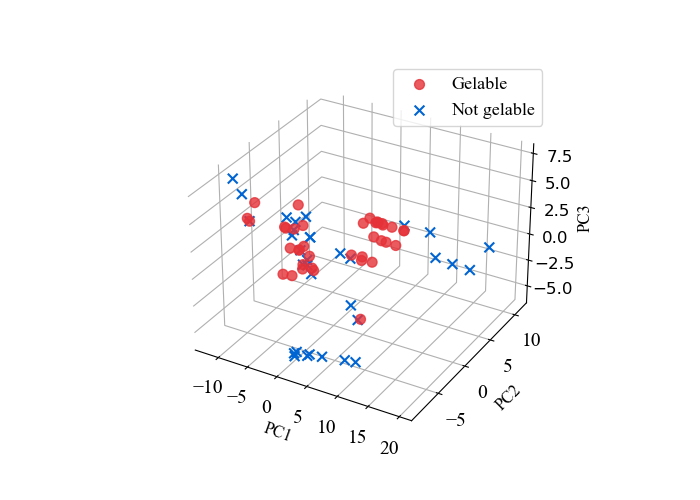

In [23]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib ipympl
plt.rcParams['figure.figsize'] = (7, 5) 
plt.rcParams['axes.facecolor']='white'
ax=plt.subplot(111,projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
gel_pca=PCA_144.loc[PCA_144["gelation"] == "Gelable"]
nogel_pca=PCA_144.loc[PCA_144["gelation"] == "Notgelable"]
ax.scatter(gel_pca['PCA1'],gel_pca["PCA2"],gel_pca["PCA3"],alpha=0.8, c="#e53238",label = 'Gelable',marker="o",s=50)
ax.scatter(nogel_pca['PCA1'],nogel_pca["PCA2"],nogel_pca["PCA3"],alpha=1,c="#0064d2", label = 'Not gelable',marker="x",s=50)
ax.legend(bbox_to_anchor=(0.75,0.85),loc=10,framealpha=1, fontsize=12, borderaxespad=0)
ax.set_xlabel('PC1',fontproperties = 'Times New Roman',fontsize = 12,rotation=-20)
ax.set_ylabel('PC2',fontproperties = 'Times New Roman',fontsize = 12,rotation=45)
ax.set_zlabel('PC3',fontproperties = 'Times New Roman',fontsize = 12,rotation=90)
plt.tick_params(labelsize=12) 
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.legend(prop={'family' : 'Times New Roman', 'size'   : 13})
plt.savefig("./original figure/Figure_S3.svg", dpi=600,format="svg")
plt.show()

In [24]:
pca = PCA(n_components=3,random_state=0)
pca.fit(ML_data)
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_)  
print(pca.n_features_)
print(pca.n_features_in_)

[0.35123177 0.16126742 0.10588779]
[1.00705411 0.46238706 0.30360218]
40
40


In [25]:
newdf = pca.fit_transform(ML_data)
PCA_40=pd.DataFrame(newdf)
PCA_40.columns=["PCA1","PCA2","PCA3"]
PCA_40.index=Raw_data.index
PCA_40['gelation']=Raw_data['Gelability']
PCA_40.head()

,PCA1,PCA2,PCA3,gelation
ID,,,,
Ma_2019_A,0.060760,-0.787136,-0.443432,Gelable
Ma_2019_U,0.251264,0.889912,-0.977342,Gelable
Ma_2019_C,0.877747,-0.234788,-0.955000,Gelable
Ma_2019_G,-0.413796,-0.353141,-0.096510,Gelable
Ma_2019_dA,0.128364,-0.699121,-0.541369,Gelable


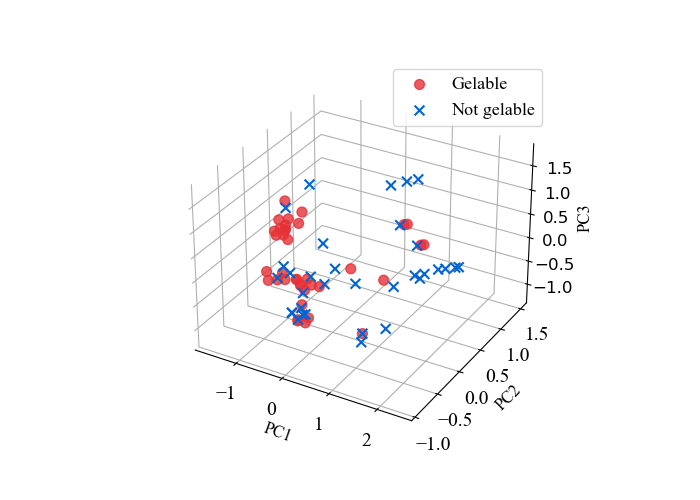

In [28]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib ipympl
plt.rcParams['figure.figsize'] = (7, 5) 
plt.rcParams['axes.facecolor']='white'
ax=plt.subplot(111,projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
gel_pca=PCA_40.loc[PCA_40["gelation"] == "Gelable"]
nogel_pca=PCA_40.loc[PCA_40["gelation"] == "Notgelable"]
ax.scatter(gel_pca['PCA1'],gel_pca["PCA2"],gel_pca["PCA3"],alpha=0.8, c="#e53238",label = 'Gelable',marker="o",s=50)
ax.scatter(nogel_pca['PCA1'],nogel_pca["PCA2"],nogel_pca["PCA3"],alpha=1,c="#0064d2", label = 'Not gelable',marker="x",s=50)
ax.legend(bbox_to_anchor=(0.75,0.85),loc=10,framealpha=1, fontsize=12, borderaxespad=0)
ax.set_xlabel('PC1',fontproperties = 'Times New Roman',fontsize = 12,rotation=-20)
ax.set_ylabel('PC2',fontproperties = 'Times New Roman',fontsize = 12,rotation=45)
ax.set_zlabel('PC3',fontproperties = 'Times New Roman',fontsize = 12,rotation=90)
plt.tick_params(labelsize=12) 
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.legend(prop={'family' : 'Times New Roman', 'size'   : 13})
plt.savefig("./original figure/Figure1_e.svg", dpi=600,format="svg")
plt.show()

In [29]:
import seaborn as sns
df_corr=X_scaled_data.corr(method='spearman')
df_corr


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
MW,1.000000,-0.504089,0.972424,0.950508,0.956019,0.942801,-0.067029,-0.609053,0.164381,-0.573571,...,NaN,NaN,0.011667,0.312427,0.970833,0.780662,0.321849,-0.740415,0.904888,0.307759
AMW,-0.504089,1.000000,-0.613521,-0.652358,-0.649753,-0.664313,0.669613,0.896722,0.246838,0.562495,...,NaN,NaN,-0.069999,0.040466,-0.580274,-0.582774,0.414975,0.853036,-0.528797,0.313585
Sv,0.972424,-0.613521,1.000000,0.987428,0.992854,0.982287,-0.150127,-0.702066,0.125567,-0.609870,...,NaN,NaN,0.035000,0.329656,0.988267,0.834370,0.270283,-0.772470,0.923368,0.270694
Se,0.950508,-0.652358,0.987428,1.000000,0.980852,0.996603,-0.238126,-0.701250,0.031920,-0.554839,...,NaN,NaN,0.023333,0.270843,0.970589,0.813035,0.219806,-0.785651,0.905266,0.217616
Sp,0.956019,-0.649753,0.992854,0.980852,1.000000,0.978898,-0.172202,-0.747390,0.138315,-0.627583,...,NaN,NaN,0.046666,0.336047,0.976050,0.842231,0.227843,-0.794875,0.917769,0.246989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s34_relSize,0.780662,-0.582774,0.834370,0.813035,0.842231,0.816782,-0.056586,-0.698852,0.250256,-0.571502,...,NaN,NaN,0.067311,0.461515,0.874074,1.000000,0.198314,-0.706782,0.929331,0.347604
s34_phSize,0.321849,0.414975,0.270283,0.219806,0.227843,0.216530,0.725380,0.170985,0.605686,-0.125756,...,NaN,NaN,0.026345,0.639383,0.317235,0.198314,1.000000,0.277142,0.355579,0.909343
s34_phRelSize,-0.740415,0.853036,-0.772470,-0.785651,-0.794875,-0.786097,0.440862,0.807099,0.050447,0.643177,...,NaN,NaN,-0.046690,-0.054667,-0.759368,-0.706782,0.277142,1.000000,-0.736526,0.165547
chiralMoment,0.904888,-0.528797,0.923368,0.905266,0.917769,0.903728,0.021725,-0.648346,0.304918,-0.605495,...,NaN,NaN,0.064323,0.484649,0.949746,0.929331,0.355579,-0.736526,1.000000,0.460666


<AxesSubplot:>

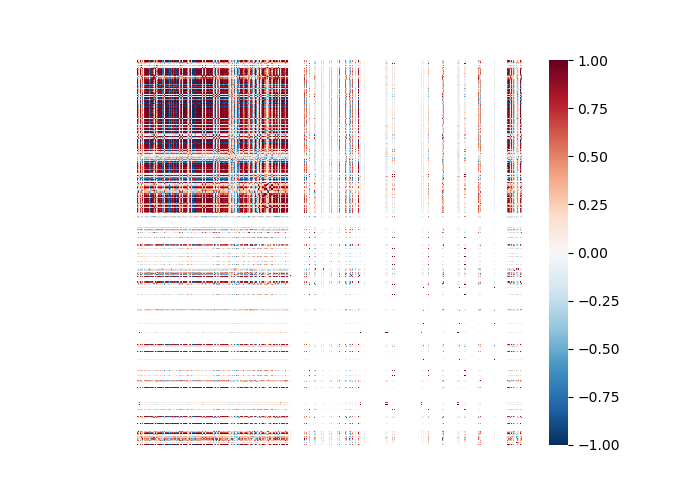

In [30]:
%matplotlib ipympl
sns.heatmap(df_corr, square=True, vmax=1, vmin=-1, center=0, cmap='RdBu_r', annot=False, xticklabels=False, yticklabels=False)


In [ ]:
plt.savefig('./original figure/Figure_S2.svg', dpi=600,format="svg")

In [ ]:
plt.savefig('./original figure/Figure_S2.png', dpi=300,format="png")

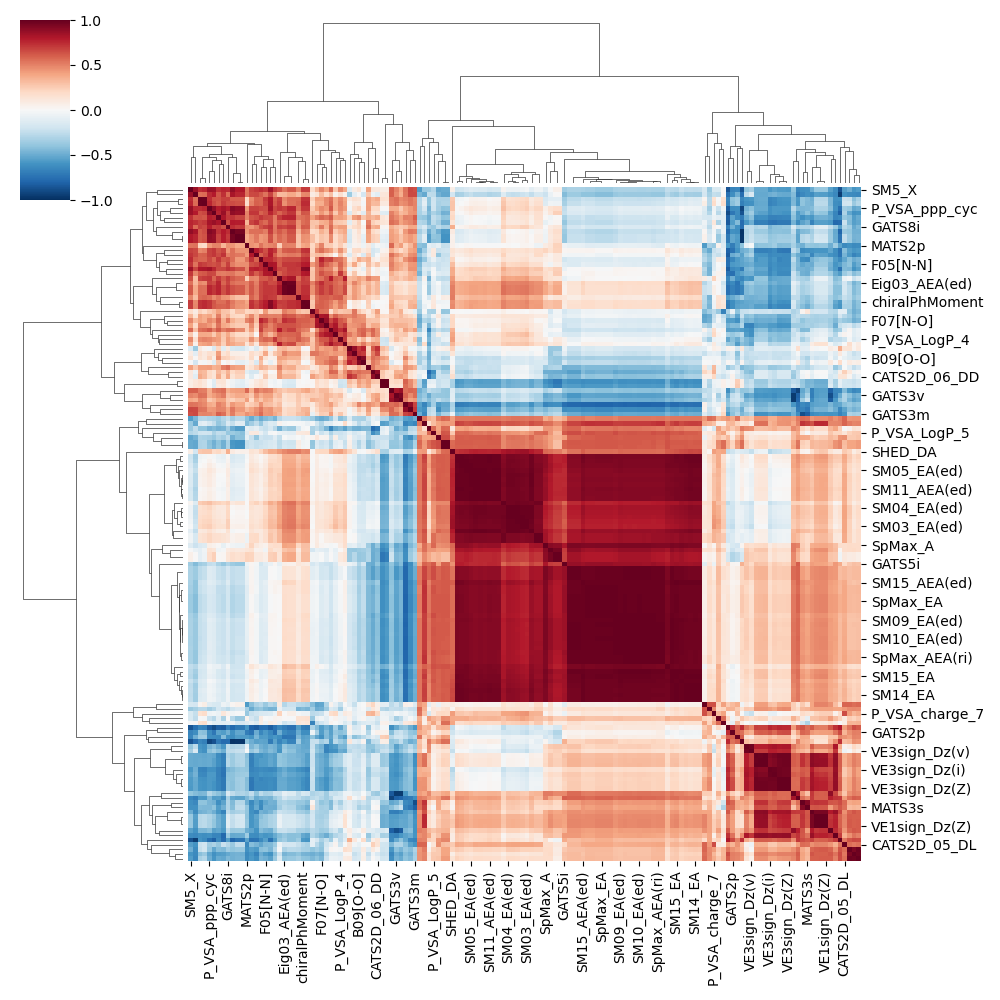

In [201]:
import seaborn as sns
df_corr=X_scaled_data.corr(method='spearman')
df_corr
sns.clustermap(df_corr, square=True, vmax=1, vmin=-1, center=0, cmap='RdBu_r', annot=False)
plt.savefig('./original figure/Figure_S4.svg', dpi=600,format="svg")

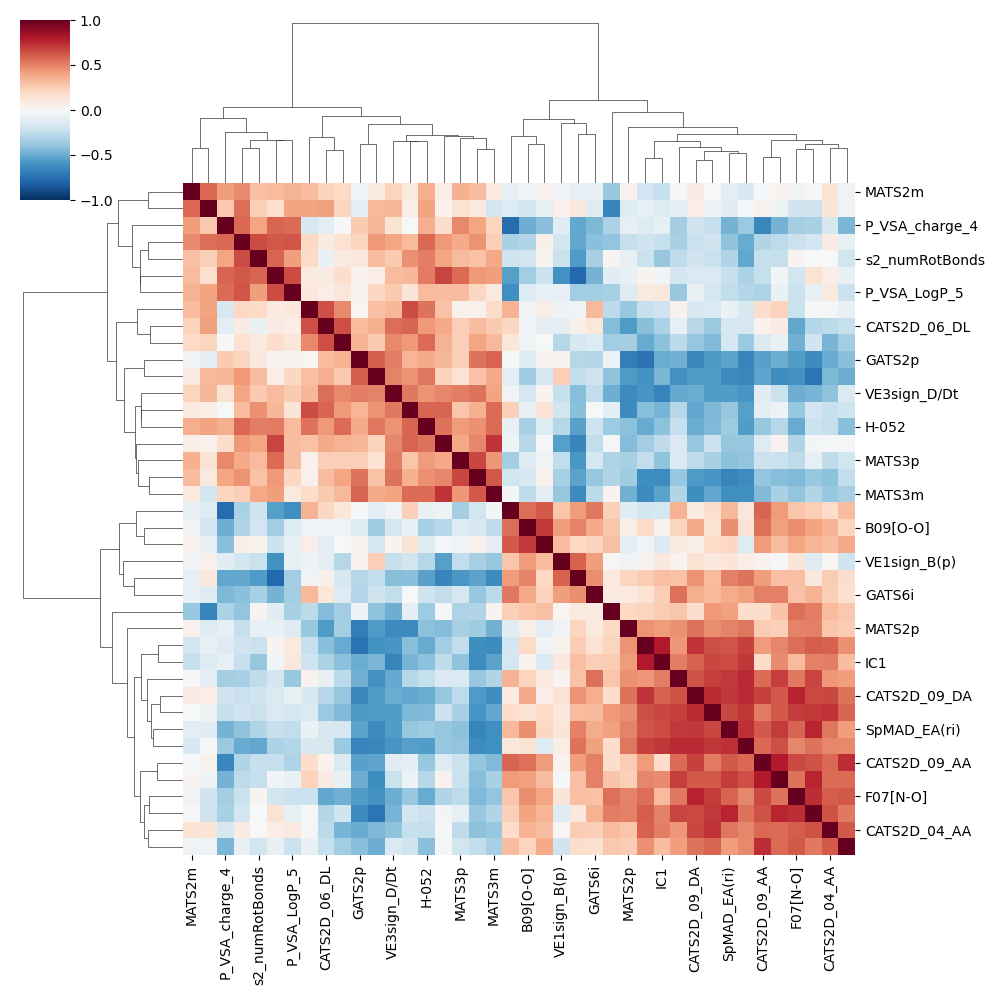

In [180]:
import seaborn as sns
df_corr=ML_data.corr(method='spearman')
df_corr
sns.clustermap(df_corr, square=True, vmax=1, vmin=-1, center=0, cmap='RdBu_r', annot=False)
plt.savefig('./original figure/Figure1_d.svg', dpi=600,format="svg")

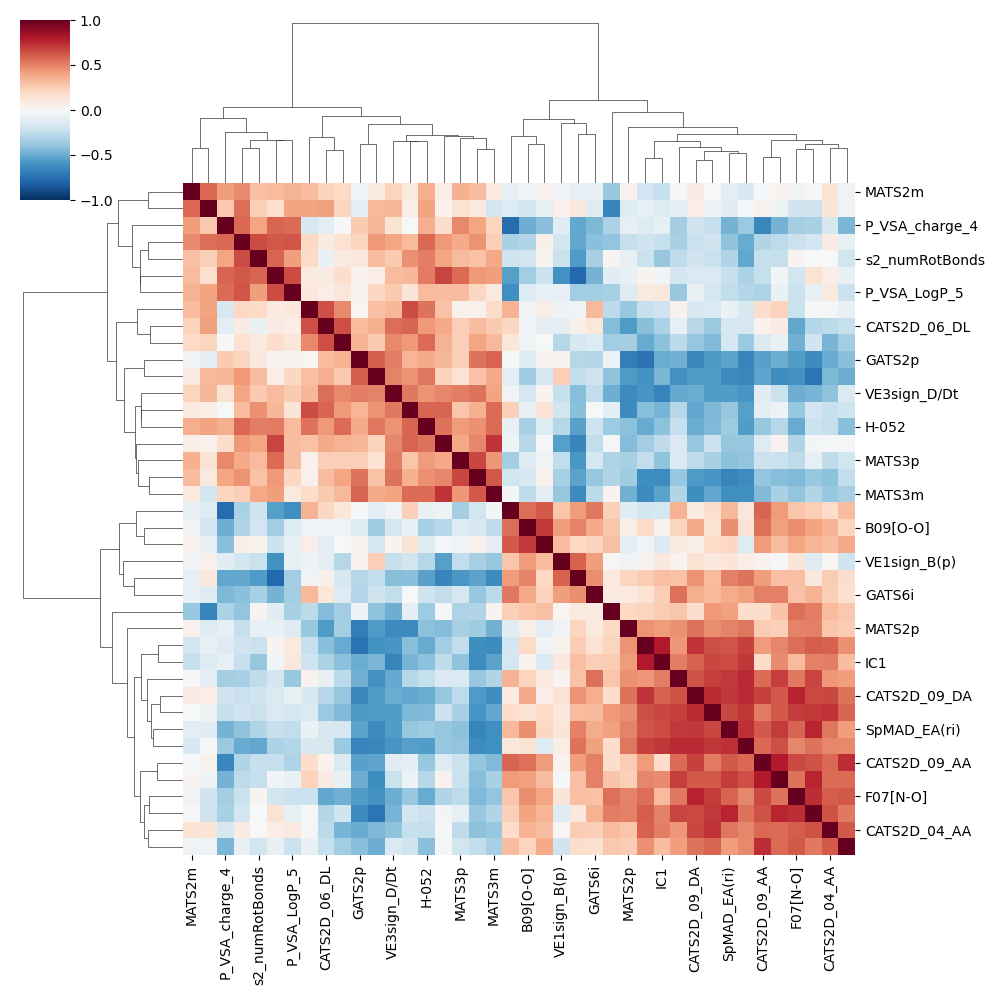

In [ ]:
import seaborn as sns
df_corr=ML_data.corr(method='spearman')
df_corr
sns.clustermap(df_corr, square=True, vmax=1, vmin=-1, center=0, cmap='RdBu_r', annot=False)
plt.savefig('./original figure/Figure1_d.svg', dpi=600,format="svg")

In [ ]:
#Ranksum test
Ranksums_data=X_NAomit_data
Ranksums_data["Gelability"]=Raw_data['Gelability']
Notgelable=Ranksums_data.loc[Ranksums_data["Gelability"] == 'Notgelable']
Gelable=Ranksums_data.loc[Ranksums_data["Gelability"] == 'Gelable']
Ranksums_result=[]
for i in list(Ranksums_data.columns):
 NG = Notgelable[i]
 G = Gelable[i]
 Ranksums_caculate=ranksums(NG, G, alternative='two-sided', nan_policy='omit')
 Ranksums_result.append(Ranksums_caculate)
Ranksums_results = pd.DataFrame(Ranksums_result, columns=['Statistics','Pvalues'])
Ranksums_results.index=Ranksums_data.columns#
Ranksums_results = Ranksums_results.drop('Gelability',axis = 0)
#Ranksums_results.sort_values(by="Pvalues" , inplace=True, ascending=True)
Ranksums_results.head()

,Statistics,Pvalues
MW,0.293979,0.768774
AMW,-1.158622,0.246610
Sv,0.386207,0.699343
Se,0.755122,0.450176
Sp,0.582193,0.560437


In [121]:
NG_mean=Notgelable.median(axis=0) 
G_mean=Gelable.median(axis=0) 
Difference_mean=(G_mean/NG_mean)
Difference_mean

MW                1.063491
AMW               1.014316
Sv                0.993984
Se                0.942996
Sp                1.004720
                    ...   
s34_relSize       0.999621
s34_phSize        1.145161
s34_phRelSize     1.021358
chiralMoment      1.049045
chiralPhMoment    1.050103
Length: 4175, dtype: float64

In [122]:
import math # This will import math module


In [123]:
Ranksums_results['Difference_mean']=np.log(Difference_mean)
Ranksums_results['Var']=Ranksums_data.std()/Ranksums_data.mean()
Ranksums_results['Log_P']=-np.log(Ranksums_results['Pvalues'])
#Ranksums_results['DM']=Difference_mean
#Ranksums_results['V']=Ranksums_data.std()/Ranksums_data.mean()

Ranksums_results.head()

,Statistics,Pvalues,Difference_mean,Var,Log_P
MW,0.293979,0.768774,0.061557,0.270440,0.262958
AMW,-1.158622,0.246610,0.014214,0.119007,1.399945
Sv,0.386207,0.699343,-0.006034,0.331826,0.357614
Se,0.755122,0.450176,-0.058693,0.339533,0.798117
Sp,0.582193,0.560437,0.004709,0.359653,0.579039


In [124]:
Ranksums_results['Difference_mean']=Difference_mean
Ranksums_results['Log_P']=-np.log(Ranksums_results['Pvalues'])
#Ranksums_results['DM']=Difference_mean

In [125]:
Ranksums_results_a=Ranksums_results.loc[Ranksums_results["Pvalues"] <0.05]
Ranksums_results_b=Ranksums_results.loc[Ranksums_results["Pvalues"] >=0.05]

In [126]:
Ranksums_results_a=Ranksums_results.loc[(Ranksums_results["Pvalues"] <0.05)&(Ranksums_results["Difference_mean"]>0)]
Ranksums_results_b=Ranksums_results.loc[(Ranksums_results["Pvalues"] <0.05)&(Ranksums_results["Difference_mean"]<0)]
Ranksums_results_c=Ranksums_results.loc[Ranksums_results["Pvalues"] >=0.05]

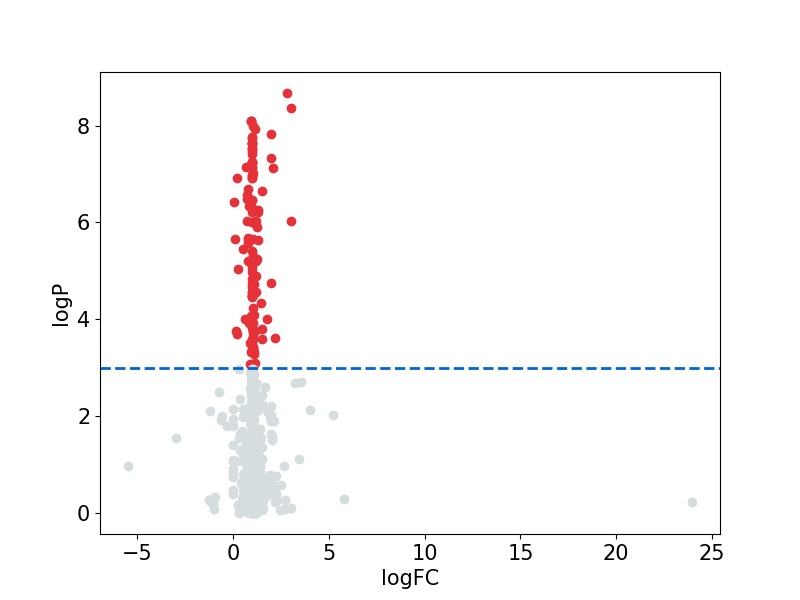

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=100)
ax=plt.subplot(111)
cm1 = plt.cm.get_cmap('Reds') 
cm2 = plt.cm.get_cmap('BuPu_r')
sc1=plt.scatter( Ranksums_results_a['Difference_mean'],Ranksums_results_a['Log_P'],c="#e53238", cmap=cm2)
sc3=plt.scatter( Ranksums_results_c['Difference_mean'],Ranksums_results_c['Log_P'],c="#d6dddf", cmap=cm2)
plt.axhline(y=-np.log(0.05), 
            #xmin=0.2,
            #xmax=0.75,
            c="#0064d2",
            linestyle='--',
            linewidth=2,
            #marker='*',
            markerfacecolor='w',
            markersize=10,#marker大小
         )
plt.tick_params(labelsize=15) 
ax.set_xlabel('logFC',fontsize = 15)
ax.set_ylabel('logP',fontsize = 15)
plt.show()
plt.savefig("./original figure/Figure_1c.svg", dpi=600,format="svg")

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=100)
ax=plt.subplot(111)
cm1 = plt.cm.get_cmap('Reds') 
cm2 = plt.cm.get_cmap('BuPu_r')
sc1=plt.scatter( Ranksums_results_a['Difference_mean'],Ranksums_results_a['Log_P'],c="#e53238", cmap=cm2)
sc3=plt.scatter( Ranksums_results_c['Difference_mean'],Ranksums_results_c['Log_P'],c="#d6dddf", cmap=cm2)
plt.axhline(y=-np.log(0.05), 
            #xmin=0.2,
            #xmax=0.75,
            c="#0064d2",
            linestyle='--',
            linewidth=2,
            #marker='*',
            markerfacecolor='w',
            markersize=10,#marker大小
         )
plt.tick_params(labelsize=15) 
ax.set_xlabel('logFC',fontsize = 15)
ax.set_ylabel('logP',fontsize = 15)
plt.show()
plt.savefig("./original figure/Figure_1c.svg", dpi=600,format="svg")

In [202]:
Ranksums_results

,Statistics,Pvalues,Difference_mean,Var,Log_P
MW,0.293979,0.768774,1.063491,0.270440,0.262958
AMW,-1.158622,0.246610,1.014316,0.119007,1.399945
Sv,0.386207,0.699343,0.993984,0.331826,0.357614
Se,0.755122,0.450176,0.942996,0.339533,0.798117
Sp,0.582193,0.560437,1.004720,0.359653,0.579039
...,...,...,...,...,...
s34_relSize,-0.449614,0.652989,0.999621,0.039744,0.426196
s34_phSize,-1.827279,0.067658,1.145161,0.159650,2.693292
s34_phRelSize,-1.279672,0.200661,1.021358,0.232002,1.606140
chiralMoment,0.023057,0.981605,1.049045,0.423725,0.018567


In [222]:
Ranklast_results=Ranksums_results.loc[X_scaled_data.columns.tolist(),:]
Ranklast_results

,Statistics,Pvalues,Difference_mean,Var,Log_P
MATS3p,3.758315,0.000171,2.791780,-1.655433,8.673489
MATS3v,3.677615,0.000235,3.038461,-1.910175,8.354119
SM10_AEA(dm),3.608444,0.000308,0.945863,0.085533,8.085283
Eig01_EA(ed),3.608444,0.000308,0.945863,0.085533,8.085283
SpMax_EA(ed),3.608444,0.000308,0.945863,0.085533,8.085283
...,...,...,...,...,...
SM15_EA(ri),1.988679,0.046737,0.992386,0.026268,3.063227
GNar,-1.977151,0.048025,1.018965,0.035613,3.036041
SM03_EA(ed),1.977151,0.048025,0.985348,0.034193,3.036041
X0A,1.965622,0.049342,0.993426,0.020637,3.008974


In [ ]:
pd.merge(ML_data.columns,["Yes"]*40)

In [251]:
Corr_data=pd.DataFrame(["Yes"]*40,columns=['Correlation'])
Corr_data.index=ML_data.columns
Corr_data.head()

,Correlation
MATS3p,Yes
SM10_AEA(dm),Yes
GATS7s,Yes
F07[N-O],Yes
VE1sign_Dz(v),Yes


In [252]:
Corrlast=Ranklast_results.join(Corr_data)
Corrlast['Correlation'].fillna("No", inplace=True)
Corrlast

,Statistics,Pvalues,Difference_mean,Var,Log_P,Correlation
MATS3p,3.758315,0.000171,2.791780,-1.655433,8.673489,Yes
MATS3v,3.677615,0.000235,3.038461,-1.910175,8.354119,No
SM10_AEA(dm),3.608444,0.000308,0.945863,0.085533,8.085283,Yes
Eig01_EA(ed),3.608444,0.000308,0.945863,0.085533,8.085283,No
SpMax_EA(ed),3.608444,0.000308,0.945863,0.085533,8.085283,No
...,...,...,...,...,...,...
SM15_EA(ri),1.988679,0.046737,0.992386,0.026268,3.063227,No
GNar,-1.977151,0.048025,1.018965,0.035613,3.036041,No
SM03_EA(ed),1.977151,0.048025,0.985348,0.034193,3.036041,No
X0A,1.965622,0.049342,0.993426,0.020637,3.008974,No


In [253]:
Corrlast_a=Corrlast.loc[Corrlast["Correlation"]=="Yes"]
Corrlast_b=Corrlast.loc[Corrlast["Correlation"]=="No"]
Corrlast_b

,Statistics,Pvalues,Difference_mean,Var,Log_P,Correlation
MATS3v,3.677615,0.000235,3.038461,-1.910175,8.354119,No
Eig01_EA(ed),3.608444,0.000308,0.945863,0.085533,8.085283,No
SpMax_EA(ed),3.608444,0.000308,0.945863,0.085533,8.085283,No
GATS3v,-3.585387,0.000337,1.046021,0.068440,7.996677,No
SM12_EA(ed),3.521979,0.000428,0.982159,0.031455,7.755600,No
...,...,...,...,...,...,...
SpMAD_A,-1.988679,0.046737,1.007124,0.023372,3.063227,No
SM15_EA(ri),1.988679,0.046737,0.992386,0.026268,3.063227,No
GNar,-1.977151,0.048025,1.018965,0.035613,3.036041,No
SM03_EA(ed),1.977151,0.048025,0.985348,0.034193,3.036041,No


In [254]:
Corrlast_a

,Statistics,Pvalues,Difference_mean,Var,Log_P,Correlation
MATS3p,3.758315,0.000171,2.791780,-1.655433,8.673489,Yes
SM10_AEA(dm),3.608444,0.000308,0.945863,0.085533,8.085283,Yes
GATS7s,-3.568094,0.000360,1.151747,0.191998,7.930552,Yes
F07[N-O],-3.539272,0.000401,2.000000,0.609870,7.820972,Yes
VE1sign_Dz(v),3.354815,0.000794,0.671637,0.608874,7.138200,Yes
VE3sign_D/Dt,3.349051,0.000811,2.052798,-0.580671,7.117379,Yes
P_VSA_charge_4,3.153065,0.001616,0.052920,0.992092,6.428013,Yes
CATS2D_09_DA,-3.037779,0.002383,3.000000,0.543592,6.039276,Yes
B09[O-O],-2.859086,0.004249,inf,0.812690,5.461159,Yes
CATS2D_06_DL,2.853322,0.004326,0.500000,0.857940,5.443002,Yes


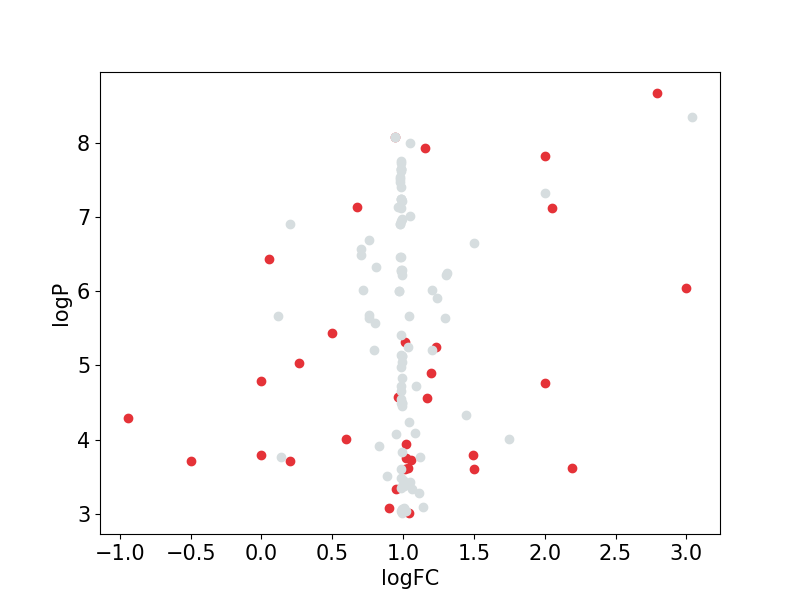

In [256]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=100)
ax=plt.subplot(111)
cm1 = plt.cm.get_cmap('Reds') 
cm2 = plt.cm.get_cmap('BuPu_r')
sc1=plt.scatter( Corrlast_a['Difference_mean'],Corrlast_a['Log_P'],c="#e53238", cmap=cm2)
sc3=plt.scatter( Corrlast_b['Difference_mean'],Corrlast_b['Log_P'],c="#d6dddf", cmap=cm2)
plt.tick_params(labelsize=15) 
ax.set_xlabel('logFC',fontsize = 15)
ax.set_ylabel('logP',fontsize = 15)
plt.show()
plt.savefig("./original figure/Figure_S5.svg", dpi=600,format="svg")